In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import math
import random

In [6]:
MAG_HD101274_B = 9.23
MAG_HD101274_V = 9.12
MAG_HD101274_G = 9.192
MAG_HD101274_J = float('nan')
MAG_HD101274_H = float('nan')
MAG_HD101274_K = float('nan')

MAG_HD101274_g = 9.1124
MAG_HD101274_r = 9.5110
MAG_HD101274_i = float('nan')
MAG_HD101274_z = 10.3072

MAG_TYCHO_2_7740_22_1_B = 12.58
MAG_TYCHO_2_7740_22_1_V = 12.12
MAG_TYCHO_2_7740_22_1_G = 11.78
MAG_TYCHO_2_7740_22_1_J = 10.919
MAG_TYCHO_2_7740_22_1_H = 10.726
MAG_TYCHO_2_7740_22_1_K = 10.611

MAG_TYCHO_2_7740_22_1_g = 11.7892
MAG_TYCHO_2_7740_22_1_r = 11.6444
MAG_TYCHO_2_7740_22_1_i = float('nan')
MAG_TYCHO_2_7740_22_1_z = 11.5203

MAG_TYCHO_2_7740_529_1_B = 11.61
MAG_TYCHO_2_7740_529_1_V = 10.94
MAG_TYCHO_2_7740_529_1_G = 10.867
MAG_TYCHO_2_7740_529_1_J = 9.902
MAG_TYCHO_2_7740_529_1_H = 9.625
MAG_TYCHO_2_7740_529_1_K = 9.580

MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


In [49]:
g_NGC3783 = np.loadtxt('NGC3783/NGC3783-g')
r_NGC3783 = np.loadtxt('NGC3783/NGC3783-r')
i_NGC3783 = np.loadtxt('NGC3783/NGC3783-i')
z_NGC3783 = np.loadtxt('NGC3783/NGC3783-z')
J_NGC3783 = np.loadtxt('NGC3783/J-NGC3783')
H_NGC3783 = np.loadtxt('NGC3783/H-NGC3783')
K_NGC3783 = np.loadtxt('NGC3783/K-NGC3783')
K_NGC7213 = np.loadtxt('NGC7213/K-NGC7213')
H_NGC7213 = np.loadtxt('NGC7213/H-NGC7213')
J_NGC7213 = np.loadtxt('NGC7213/J-NGC7213')

print J_NGC7213

[[  5.75573731e+04   5.77281319e+04   5.78763662e+04   5.79732841e+04
    5.77361375e+04   5.75934207e+04   5.76942707e+04   5.76292892e+04
    5.79362842e+04   5.75812970e+04   5.79033702e+04   5.79582561e+04
    5.75664032e+04   5.77460320e+04   5.77072368e+04   5.78573194e+04
    5.77242111e+04   5.75503941e+04   5.76132196e+04   5.76231855e+04
    5.79483153e+04   5.79163582e+04   5.75542634e+04   5.76162374e+04
    5.79452892e+04   5.76261897e+04   5.77202102e+04   5.80532763e+04
    5.75873553e+04   5.79833664e+04   5.79513196e+04   5.79252606e+04
    5.79931733e+04   5.79800957e+04   5.76094311e+04   5.80210499e+04
    5.80502407e+04   5.79702799e+04   5.77521076e+04   5.76004156e+04
    5.75613308e+04   5.80031473e+04   5.77112228e+04   5.80240820e+04
    5.77001632e+04   5.77142271e+04   5.79622612e+04   5.75233344e+04
    5.75843012e+04   5.80472366e+04   5.75294067e+04   5.76323101e+04
    5.79063743e+04   5.77391415e+04   5.75462955e+04   5.79133541e+04
    5.77421465e+04  

In [50]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [51]:
g_NGC3783[:,2] *= flux_cal(MAG_TYCHO_2_7740_22_1_g,MAG_VEGA_g,FLUX_LAMBDA_VEGA_K)
r_NGC3783[:,2] *= flux_cal(MAG_TYCHO_2_7740_22_1_r,MAG_VEGA_r,FLUX_LAMBDA_VEGA_r)
i_NGC3783[:,2] *= flux_cal(MAG_TYCHO_2_7740_22_1_i,MAG_VEGA_i,FLUX_LAMBDA_VEGA_i)
z_NGC3783[:,2] *= flux_cal(MAG_TYCHO_2_7740_22_1_z,MAG_VEGA_z,FLUX_LAMBDA_VEGA_z)



In [61]:
#print g_NGC3783
comp_array_g = np.zeros((len(g_NGC3783[:,0]),3))
#comp_array_g[0,0] = g_NGC3783[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(g_NGC3783)):
    if g_NGC3783[i,0] != comp_array_g[tjek,0]:
        comp_array_g[tjek,0] = g_NGC3783[i,0]
        com1 = []
        for j in range(len(g_NGC3783)):
            if comp_array_g[tjek,0] == g_NGC3783[j,0]:
                com1.append(g_NGC3783[j,2])
        comp_array_g[tjek,1] = np.mean(com1)
        comp_array_g[tjek,2] = np.std(com1)
        if comp_array_g[tjek,2]/float(comp_array_g[tjek,1]) > acceptance or float(comp_array_g[tjek,1]) < 0:
            comp_array_g[tjek,1] = float('nan')
            comp_array_g[tjek,2] = float('nan')
        tjek = tjek + 1


In [66]:
#print r_NGC3783
comp_array_r = np.zeros((len(r_NGC3783[:,0]),3))
#comp_array_r[0,0] = r_NGC3783[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(r_NGC3783)):
    if r_NGC3783[i,0] != comp_array_r[tjek,0]:
        comp_array_r[tjek,0] = r_NGC3783[i,0]
        com1 = []
        for j in range(len(r_NGC3783)):
            if comp_array_r[tjek,0] == r_NGC3783[j,0]:
                com1.append(r_NGC3783[j,2])
        comp_array_r[tjek,1] = np.mean(com1)
        comp_array_r[tjek,2] = np.std(com1)
        if comp_array_r[tjek,2]/float(comp_array_r[tjek,1]) > acceptance or float(comp_array_r[tjek,1]) < 0:
            comp_array_r[tjek,1] = float('nan')
            comp_array_r[tjek,2] = float('nan')
        tjek = tjek + 1


In [67]:
#print i_NGC3783
comp_array_i = np.zeros((len(i_NGC3783[:,0]),3))
#comp_array_i[0,0] = i_NGC3783[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(i_NGC3783)):
    if i_NGC3783[i,0] != comp_array_i[tjek,0]:
        comp_array_i[tjek,0] = i_NGC3783[i,0]
        com1 = []
        for j in range(len(i_NGC3783)):
            if comp_array_i[tjek,0] == i_NGC3783[j,0]:
                com1.append(i_NGC3783[j,2])
        comp_array_i[tjek,1] = np.mean(com1)
        comp_array_i[tjek,2] = np.std(com1)
        if comp_array_i[tjek,2]/float(comp_array_i[tjek,1]) > acceptance or float(comp_array_i[tjek,1]) < 0:
            comp_array_i[tjek,1] = float('nan')
            comp_array_i[tjek,2] = float('nan')
        tjek = tjek + 1


In [68]:
#print z_NGC3783
comp_array_z = np.zeros((len(z_NGC3783[:,0]),3))
#comp_array_z[0,0] = z_NGC3783[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(z_NGC3783)):
    if z_NGC3783[i,0] != comp_array_z[tjek,0]:
        comp_array_z[tjek,0] = z_NGC3783[i,0]
        com1 = []
        for j in range(len(z_NGC3783)):
            if comp_array_z[tjek,0] == z_NGC3783[j,0]:
                com1.append(z_NGC3783[j,2])
        comp_array_z[tjek,1] = np.mean(com1)
        comp_array_z[tjek,2] = np.std(com1)
        if comp_array_z[tjek,2]/float(comp_array_z[tjek,1]) > acceptance or float(comp_array_z[tjek,1]) < 0:
            comp_array_z[tjek,1] = float('nan')
            comp_array_z[tjek,2] = float('nan')
        tjek = tjek + 1


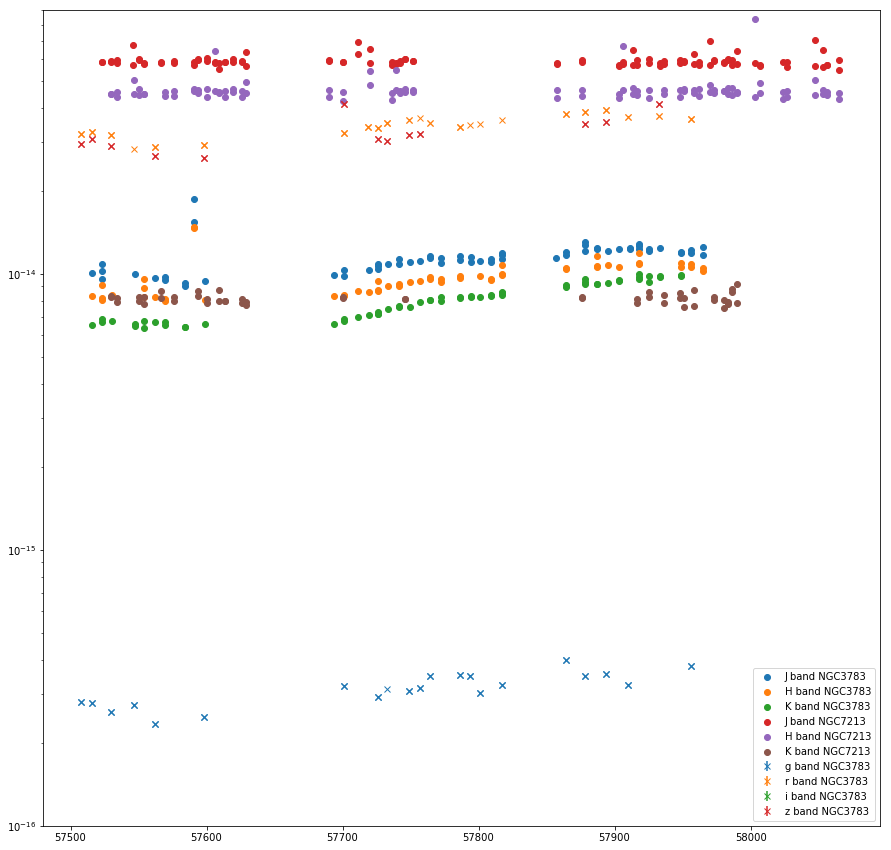

In [71]:
plt.figure(figsize=(15,15))
plt.scatter(J_NGC3783[0,:],J_NGC3783[1,:],label='J band NGC3783')
plt.scatter(H_NGC3783[0,:],H_NGC3783[1,:],label='H band NGC3783')
plt.scatter(K_NGC3783[0,:],K_NGC3783[1,:],label='K band NGC3783')
plt.scatter(J_NGC7213[0,:],J_NGC7213[1,:],label='J band NGC7213')
plt.scatter(H_NGC7213[0,:],H_NGC7213[1,:],label='H band NGC7213')
plt.scatter(K_NGC7213[0,:],K_NGC7213[1,:],label='K band NGC7213')
plt.errorbar(comp_array_g[:,0],comp_array_g[:,1],yerr=comp_array_g[:,2],fmt='x',label='g band NGC3783')
plt.errorbar(comp_array_r[:,0],comp_array_r[:,1],yerr=comp_array_r[:,2],fmt='x',label='r band NGC3783')
plt.errorbar(comp_array_i[:,0],comp_array_i[:,1],yerr=comp_array_i[:,2],fmt='x',label='i band NGC3783')
plt.errorbar(comp_array_z[:,0],comp_array_z[:,1],yerr=comp_array_z[:,2],fmt='x',label='z band NGC3783')
plt.legend()
plt.yscale('log')
plt.ylim([1*10**(-16),9*10**(-14)])
plt.show()

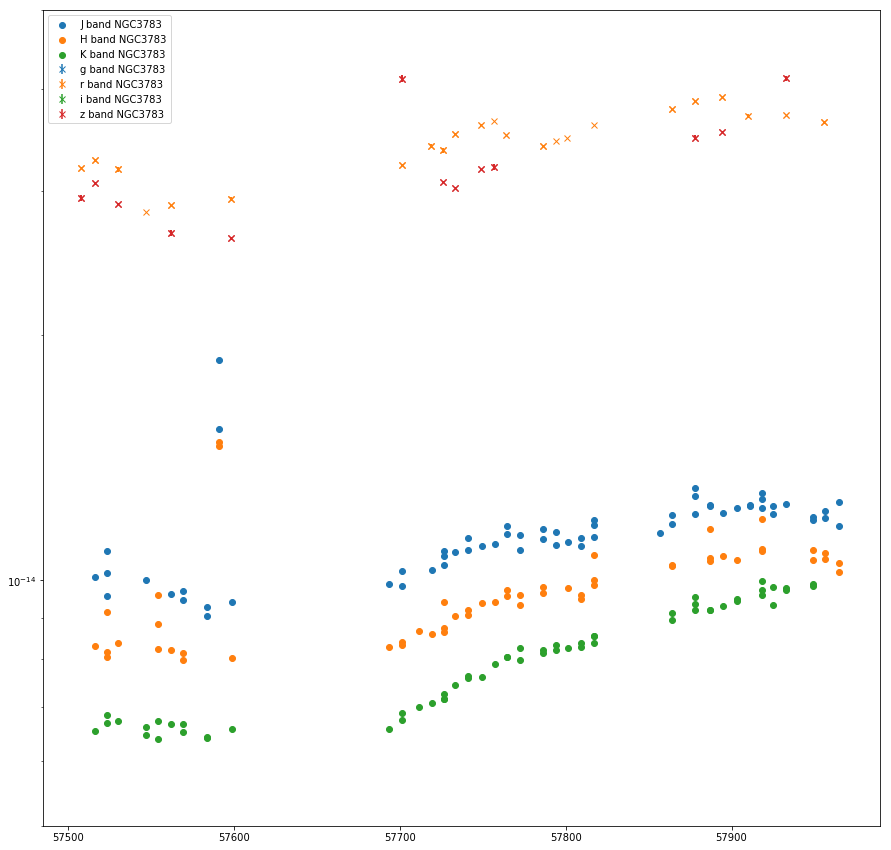

In [77]:
plt.figure(figsize=(15,15))
plt.scatter(J_NGC3783[0,:],J_NGC3783[1,:],label='J band NGC3783')
plt.scatter(H_NGC3783[0,:],H_NGC3783[1,:],label='H band NGC3783')
plt.scatter(K_NGC3783[0,:],K_NGC3783[1,:],label='K band NGC3783')
plt.errorbar(comp_array_g[:,0],comp_array_g[:,1],yerr=comp_array_g[:,2],fmt='x',label='g band NGC3783')
plt.errorbar(comp_array_r[:,0],comp_array_r[:,1],yerr=comp_array_r[:,2],fmt='x',label='r band NGC3783')
plt.errorbar(comp_array_i[:,0],comp_array_i[:,1],yerr=comp_array_i[:,2],fmt='x',label='i band NGC3783')
plt.errorbar(comp_array_z[:,0],comp_array_z[:,1],yerr=comp_array_z[:,2],fmt='x',label='z band NGC3783')
plt.legend()
plt.yscale('log')
plt.ylim([5*10**(-15),5*10**(-14)])
plt.show()

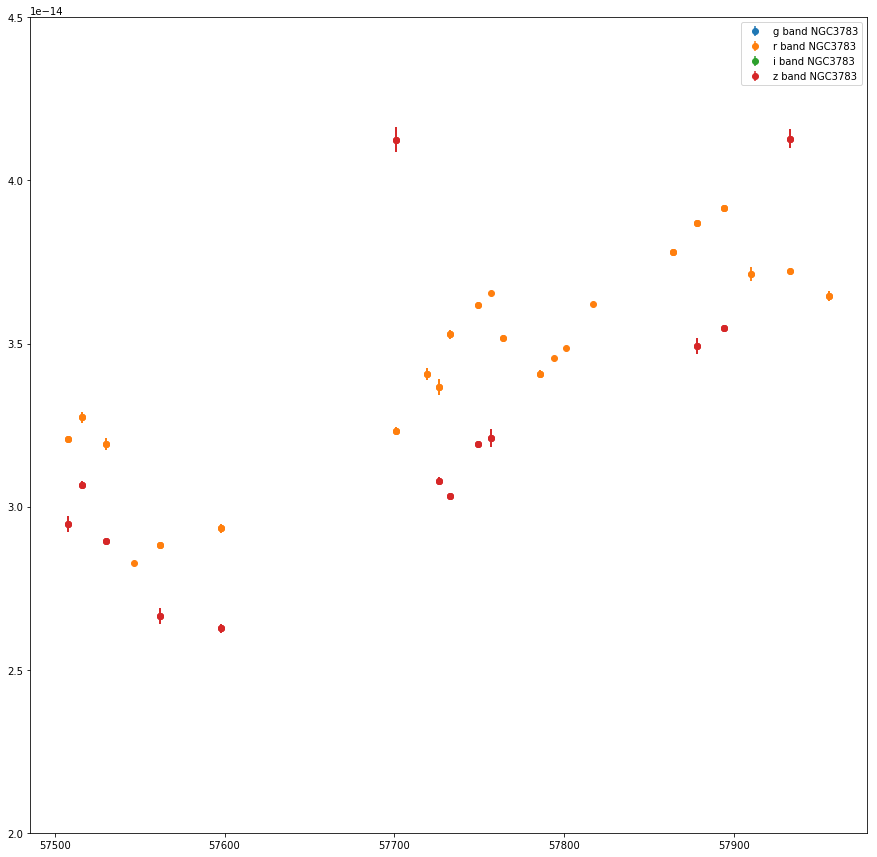

In [74]:
plt.figure(figsize=(15,15))

plt.errorbar(comp_array_g[:,0],comp_array_g[:,1],yerr=comp_array_g[:,2],fmt='o',label='g band NGC3783')
plt.errorbar(comp_array_r[:,0],comp_array_r[:,1],yerr=comp_array_r[:,2],fmt='o',label='r band NGC3783')
plt.errorbar(comp_array_i[:,0],comp_array_i[:,1],yerr=comp_array_i[:,2],fmt='o',label='i band NGC3783')
plt.errorbar(comp_array_z[:,0],comp_array_z[:,1],yerr=comp_array_z[:,2],fmt='o',label='z band NGC3783')
plt.legend()
#plt.yscale('log')
plt.ylim([2*10**(-14),4.5*10**(-14)])
plt.show()